In [1]:
import pandas as pd
TF_to_gene = pd.read_csv("NetWorkTFGene.txt", delimiter="\t", comment="#")
TF_to_gene

,1)regulatorId,2)regulatorName,3)RegulatorGeneName,4)regulatedId,5)regulatedName,6)function,7)confidenceLevel
0,ECK120011186,Fis,fis,ECK120000028,adhE,+,Strong
1,ECK120011186,Fis,fis,ECK120000040,osmE,-,Strong
2,ECK120011186,Fis,fis,ECK120000042,ansB,-,Weak
3,ECK120011186,Fis,fis,ECK120000043,apaG,+,Weak
4,ECK120011186,Fis,fis,ECK120000044,apaH,+,Weak
...,...,...,...,...,...,...,...
6055,ECK125336166,RpoN,rpoN,ECK120000323,mutM,-,Strong
6056,ECK125336166,RpoN,rpoN,ECK120000655,nth,-,Strong
6057,ECK125336166,RpoN,rpoN,ECK120002092,cspC,-,Weak
6058,ECK125336166,RpoN,rpoN,ECK120003587,yobF,-,Strong


In [3]:
PATH = "rijs_2011_all.csv"
all_data = pd.read_csv(PATH, index_col="target_gene", encoding="utf-8")
all_data

,which_CS,carbon_source_uptake,growth_rate,acetate_secretion,pts,zwf,gnd,pgi,"edd, eda","pfk, fba",...,"glta, can",icd,suc,"sdh, fum",mdh,mae,pck,pcc,"pta, acka","acea, aceb"
target_gene,,,,,,,,,,,,,,,,,,,,,
WT,gal,2.00,0.18,0.11,2.10,0.61,0.35,1.48,0.26,1.61,...,1.48,0.53,0.23,1.18,2.09,0.04,0.74,0.45,0.11,0.95
AlsR,gal,2.26,0.19,0.03,2.12,0.57,0.37,1.54,0.20,1.68,...,1.40,0.32,0.00,1.09,2.18,0.00,0.92,0.49,0.03,1.09
AppY,gal,2.64,0.18,0.15,1.94,0.53,0.41,1.40,0.13,1.59,...,1.36,0.27,0.00,1.10,2.16,0.04,0.90,0.39,0.15,1.10
ArcA,gal,2.08,0.18,0.04,2.18,0.54,0.22,1.63,0.32,1.69,...,1.94,0.91,0.64,1.67,2.67,0.03,0.82,0.38,0.04,1.03
ArcB,gal,2.49,0.19,0.04,2.49,0.63,0.62,1.85,0.02,2.16,...,2.18,1.20,0.90,1.88,2.67,0.20,0.74,0.58,0.04,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RseA,glu,6.29,0.53,5.31,6.53,1.84,1.26,4.67,0.57,5.24,...,1.55,1.55,0.84,0.84,0.56,0.28,0.22,2.02,4.78,0.00
RseB,glu,6.22,0.54,4.51,6.69,2.08,1.28,4.59,0.80,5.14,...,1.63,1.63,0.84,0.84,0.56,0.29,0.22,2.17,4.38,0.00
Pgi,glu,4.01,0.32,1.51,3.77,3.61,3.09,0.15,0.52,2.02,...,0.76,0.76,0.26,0.26,0.26,0.00,0.48,1.56,1.23,0.00


In [4]:
import cobra
cobra_model = cobra.io.read_sbml_model("iML1515.xml")

genes_names_cobra_model = [x.name for x in cobra_model.genes]

In [11]:
reg_id_to_reacs_id = {}

target_genes_candidates = []
corresponding_nbr_involved_reactions = []

for regulator_gene in all_data.index:
    subset = TF_to_gene.loc[TF_to_gene['2)regulatorName'] == regulator_gene]
    nbr_target_genes = len(subset)
    if nbr_target_genes > 0:
        
        reg_id_to_reacs_id[regulator_gene] = []

        list_regulated_genes = subset["5)regulatedName"].values
        # print("According to RegulonDB, " + regulator_gene + " regulates:\n", list_regulated_genes)
        target_genes_candidates.append(regulator_gene)
        nbr_involved_reactions = 0
        for regulated_gene in list_regulated_genes:
            if regulated_gene in genes_names_cobra_model:
                # print("The regulator " + regulator_gene + " targets the " + regulated_gene + " gene in the cobra model.")
                involved_reactions = cobra_model.genes[genes_names_cobra_model.index(regulated_gene)].reactions
                # print([reac.name for reac in involved_reactions])
                nbr_involved_reactions += len(involved_reactions)

                reg_id_to_reacs_id[regulator_gene] += [reac.id for reac in involved_reactions]

        corresponding_nbr_involved_reactions.append(nbr_involved_reactions)

        reg_id_to_reacs_id[regulator_gene] = list(set(reg_id_to_reacs_id[regulator_gene]))

    else:
        # print(regulator_gene + " regulator has no target gene in regulonDB")
        # reg_id_to_reacs_id[regulator_gene] = []
        if regulator_gene in genes_names_cobra_model:
                # print("The regulator " + regulator_gene + " is directly present as the " + regulated_gene + " gene in the cobra model.")
                involved_reactions = cobra_model.genes[genes_names_cobra_model.index(regulated_gene)].reactions
                # print([reac.name for reac in involved_reactions])

    # remove duplicate reactions

    

    # print("\n\n")

len(reg_id_to_reacs_id)

63

In [14]:
# Now correct ids of reg_id_to_reacs_id with duplicated model, having different IDs

cobra_model_duplicated = cobra.io.read_sbml_model("iML1515_duplicated.xml")

reac_ids_cobra_model_duplicated = [x.id for x in cobra_model_duplicated.reactions]

reg_id_to_reacs_id_corrected = {}

for regulator in reg_id_to_reacs_id.keys():

    corrected_ids = []

    for reac_id in reg_id_to_reacs_id[regulator]:

        for reac_id_duplicated in reac_ids_cobra_model_duplicated:
            if reac_id_duplicated.startswith(reac_id) and (reac_id_duplicated.endswith("_for") or reac_id_duplicated.endswith("_rev") or reac_id_duplicated.endswith("_o") or reac_id_duplicated.endswith("_i")):

                corrected_ids.append(reac_id_duplicated)

            if reac_id == reac_id_duplicated:

                corrected_ids.append(reac_id_duplicated)

    reg_id_to_reacs_id_corrected[regulator] = corrected_ids

len(reg_id_to_reacs_id_corrected.keys())


63

In [ ]:
reg_id_to_reacs_id_corrected.to_json("REG_to_EX.json")

In [16]:
carbon_source_to_reac_id = {"gal": "EX_gal_e_i", "glu":"EX_glc__D_e_i"}
carbon_source_to_reac_id.to_json("CS_to_EX.json")

AttributeError: 'dict' object has no attribute 'to_json'

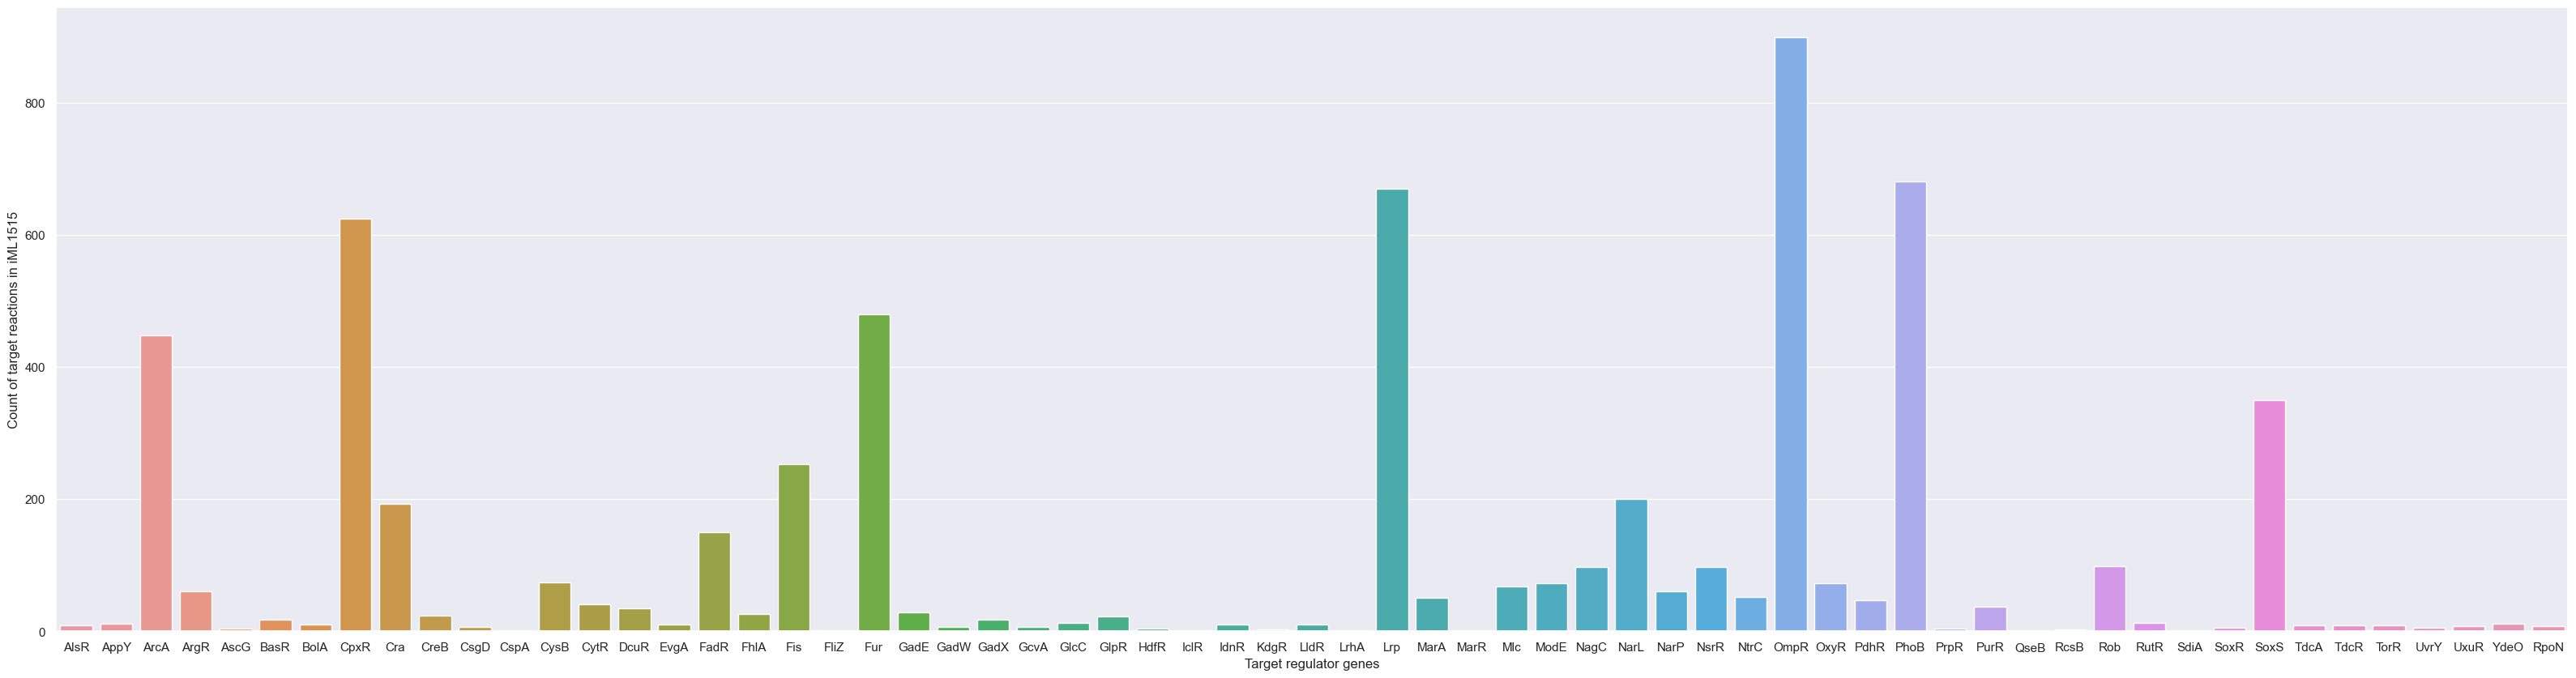

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.close('all')
fig, ax = plt.subplots(figsize=(40,10))
sns.barplot(x=target_genes_candidates, y=corresponding_nbr_involved_reactions)
plt.xlabel("Target regulator genes")
plt.ylabel("Count of target reactions in iML1515")
sns.set_theme()
plt.show()